#### **Car Price Prediction: Linear Regression**

**By : Chandrashekhar Azad**

**Objective**

The objective of this project is to develop a robust machine learning model that accurately predicts the price of a car based on various features such as make, model, year, mileage, engine size, fuel type, and other relevant characteristics. By analyzing historical data and identifying patterns, the model aims to provide reliable price estimates for both buyers and sellers in the automotive market. This will assist users in making informed decisions regarding car purchases and sales, enhancing transparency and efficiency in the market.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
296,False
297,False
298,False
299,False


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

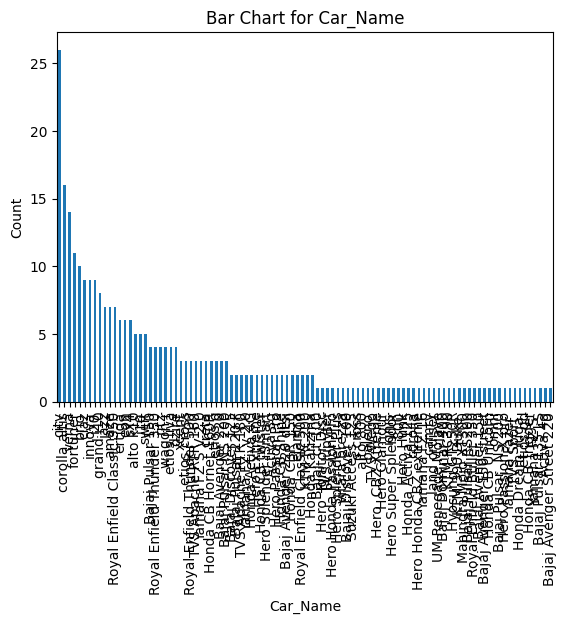

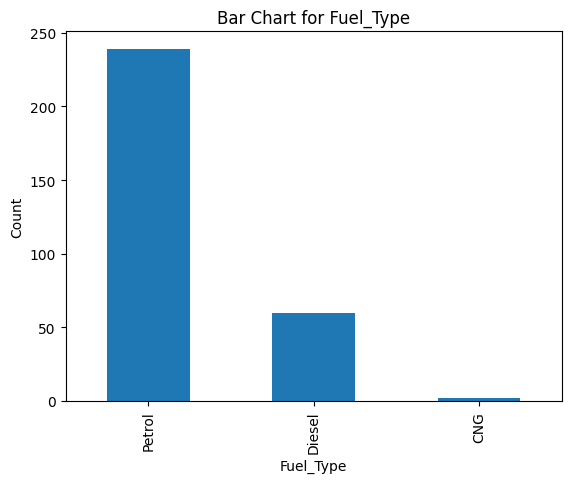

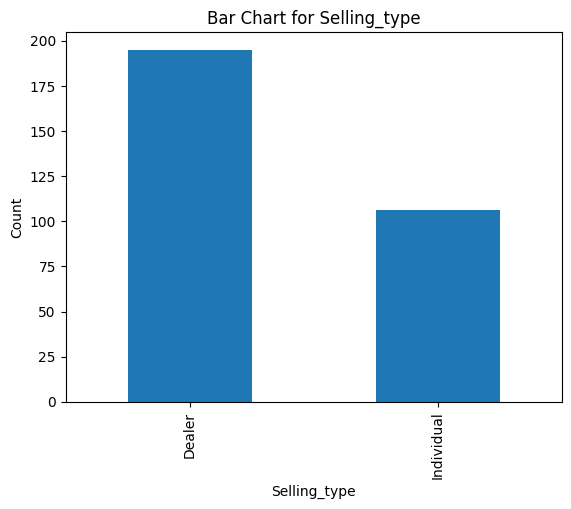

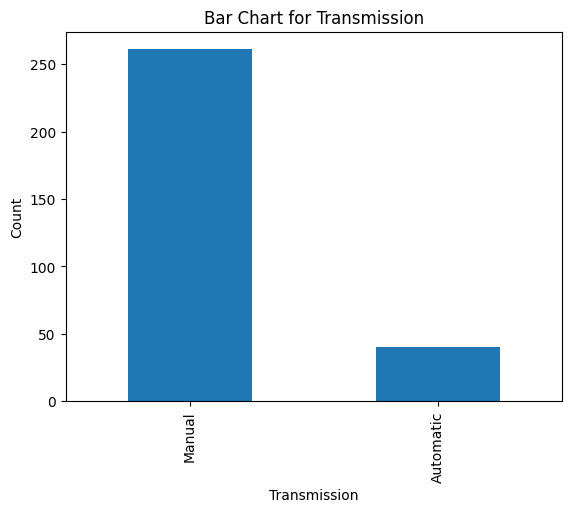

In [ ]:
# make bar chart for every categorical columns

import matplotlib.pyplot as plt
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
  plt.figure()
  df[column].value_counts().plot(kind='bar')
  plt.title(f'Bar Chart for {column}')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.show()


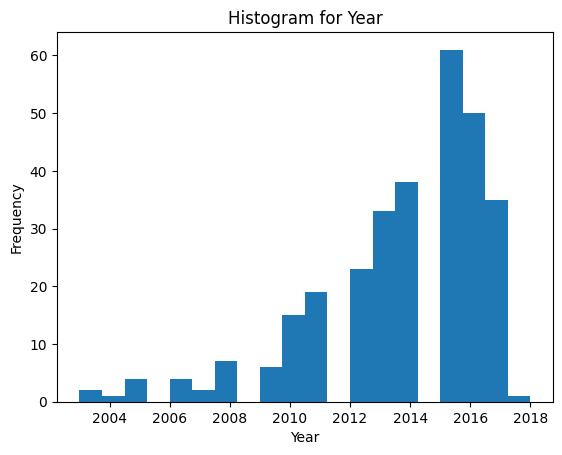

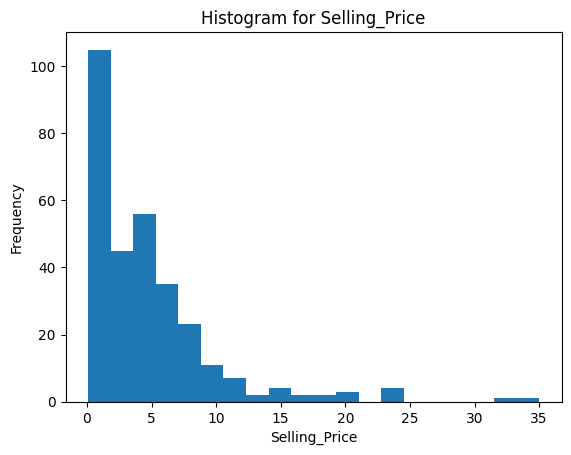

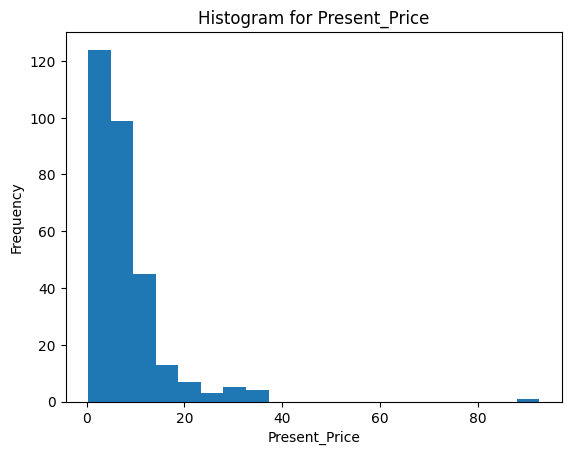

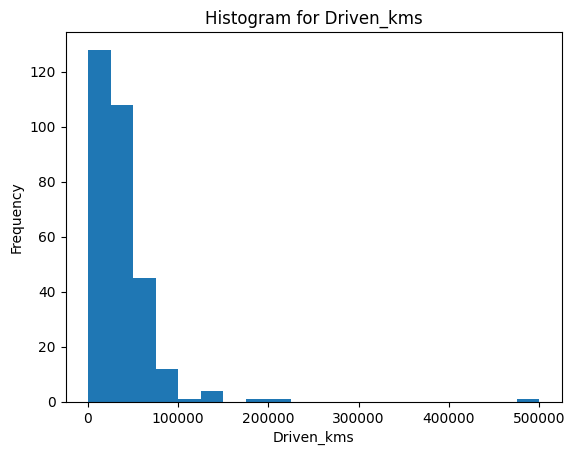

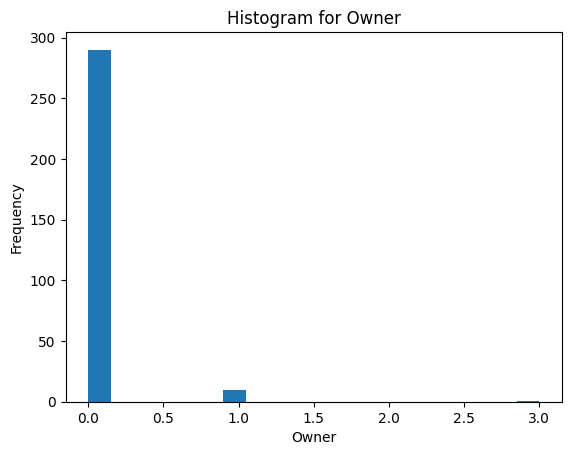

In [ ]:
# make histogram for float and integer type data  of columns

import matplotlib.pyplot as plt
numerical_columns = df.select_dtypes(include=['float', 'int']).columns
for column in numerical_columns:
  plt.figure()
  plt.hist(df[column], bins=20)
  plt.title(f'Histogram for {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()


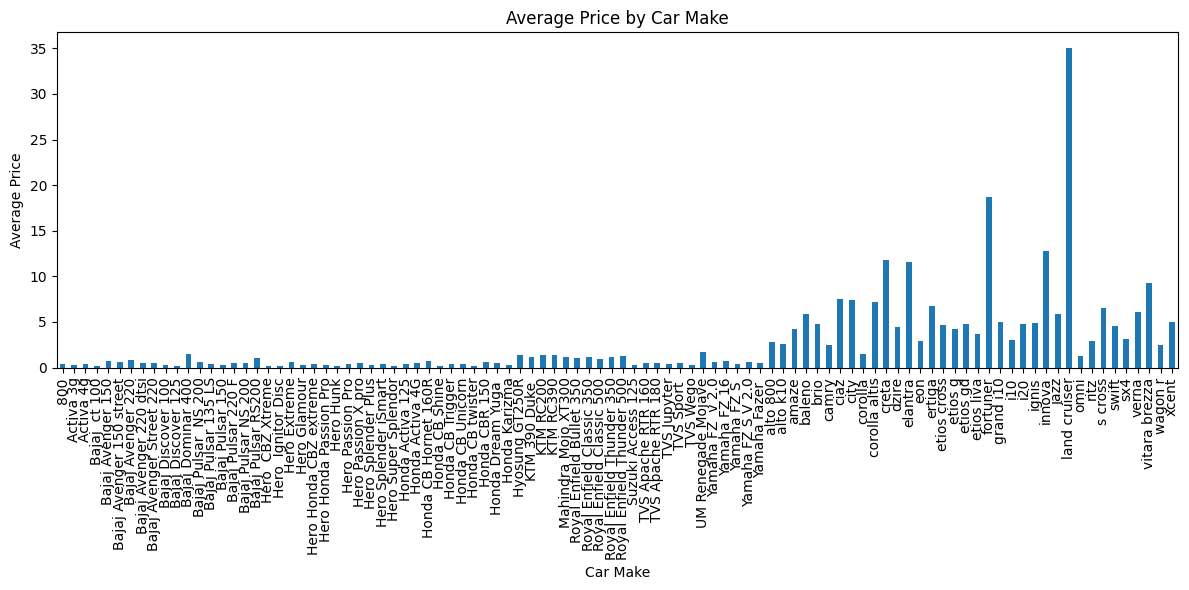

In [ ]:
# Group by 'Car_Name' and calculate the average price
average_price_by_make = df.groupby('Car_Name')['Selling_Price'].mean()

# Plot the average price by car make
plt.figure(figsize=(12, 6))
average_price_by_make.plot(kind='bar')
plt.title('Average Price by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

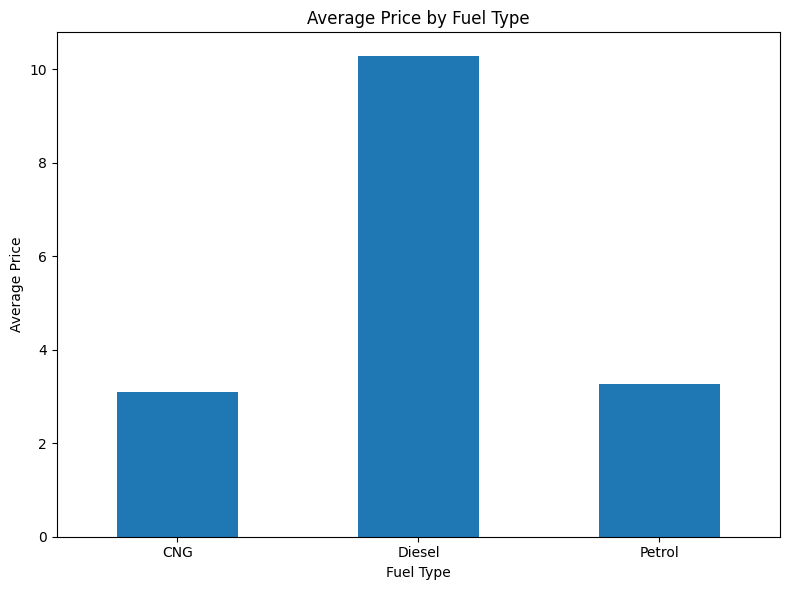

In [ ]:
# Group by 'Fuel_Type' and calculate the average price
average_price_by_fuel = df.groupby('Fuel_Type')['Selling_Price'].mean()

# Plot the average price by fuel type
plt.figure(figsize=(8, 6))
average_price_by_fuel.plot(kind='bar')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

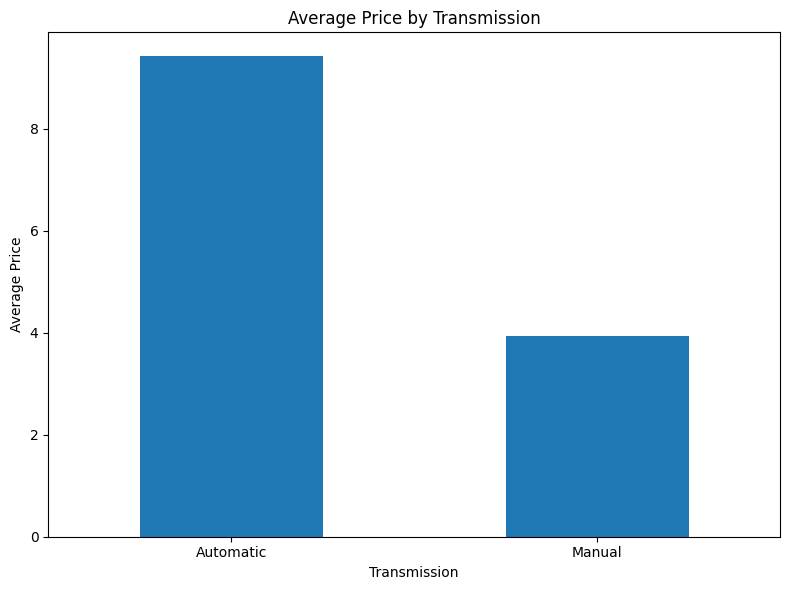

In [ ]:
# Group by 'Transmission' and calculate the average price
average_price_by_transmission = df.groupby('Transmission')['Selling_Price'].mean()

# Plot the average price by transmission
plt.figure(figsize=(8, 6))
average_price_by_transmission.plot(kind='bar')
plt.title('Average Price by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

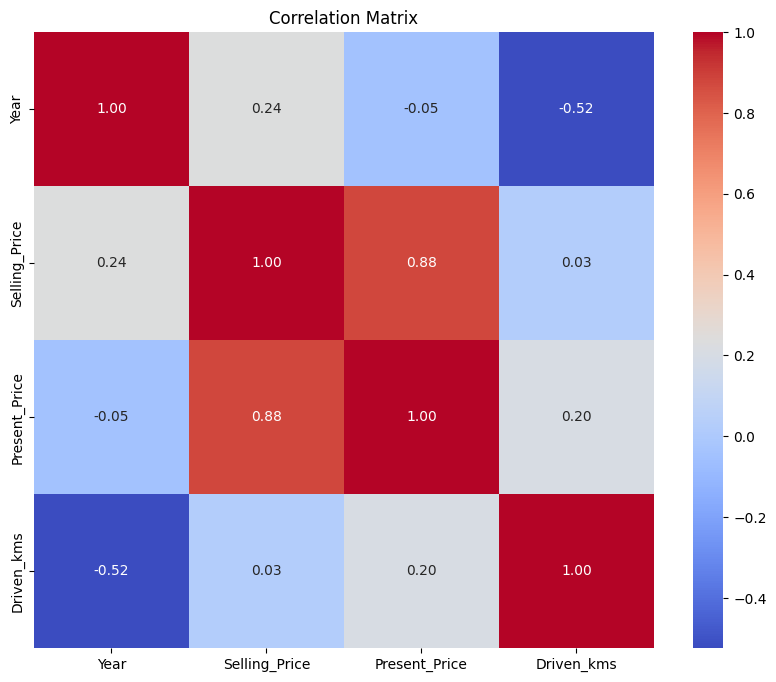

In [ ]:
# correlational matrix

correlation_matrix = df[[ 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms']].corr()
# Calculate the correlation matrix
#correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


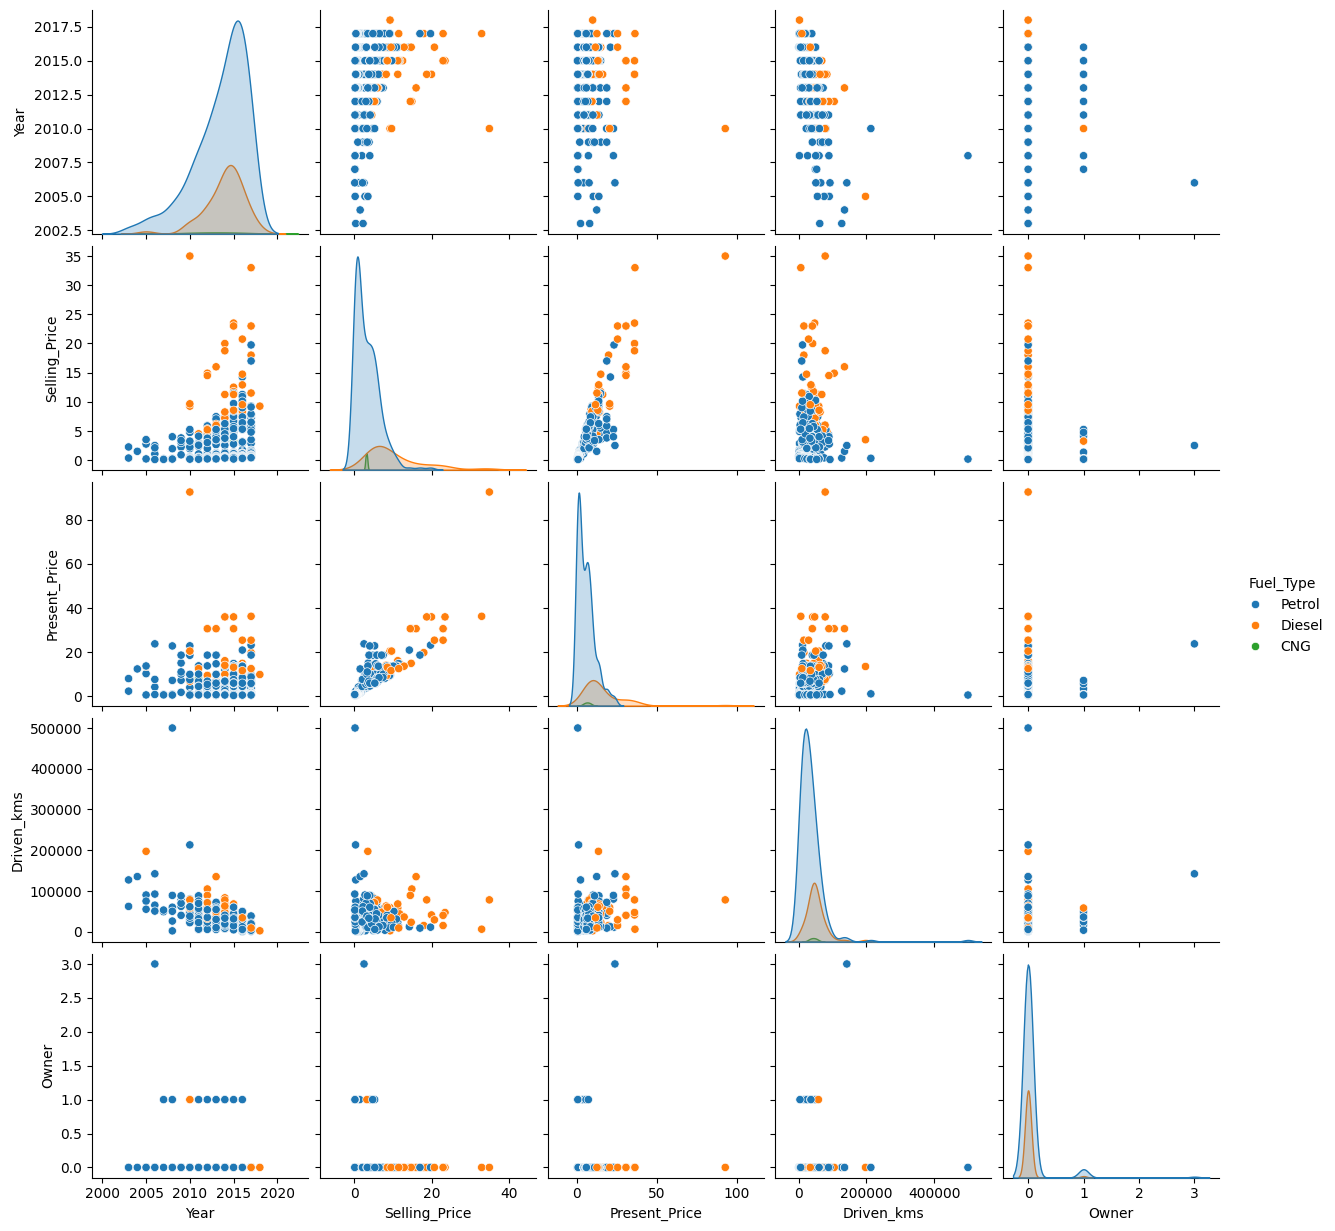

In [ ]:
# pairplot take hue as fuel type

import matplotlib.pyplot as plt
sns.pairplot(df, hue='Fuel_Type')
plt.show()


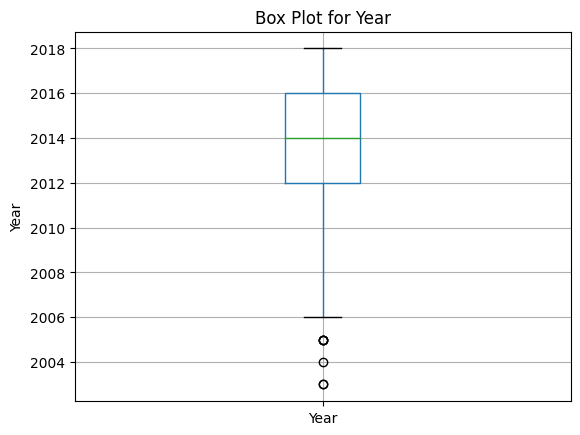

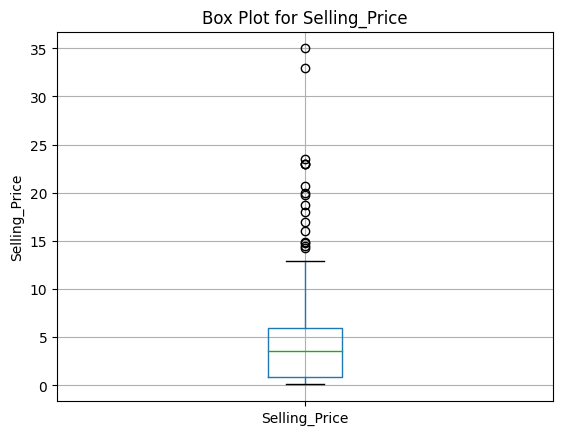

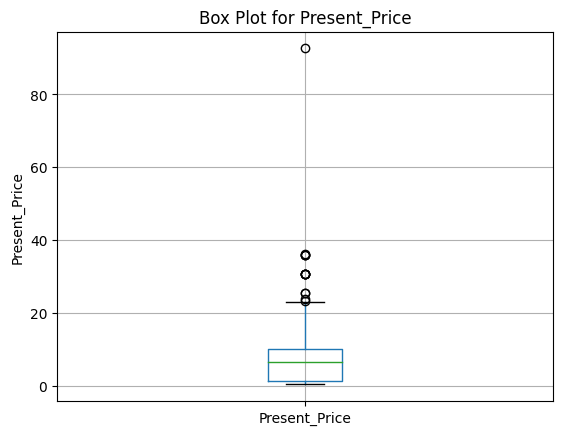

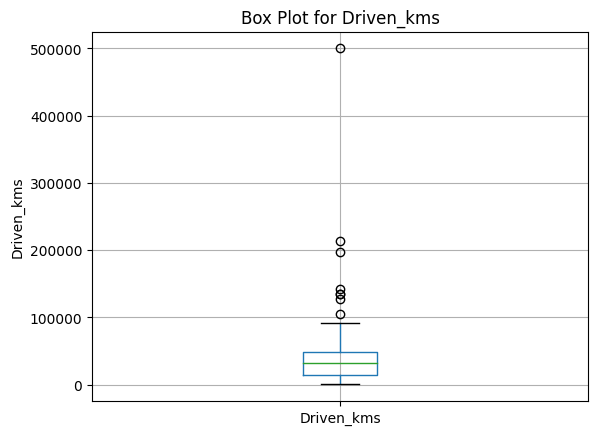

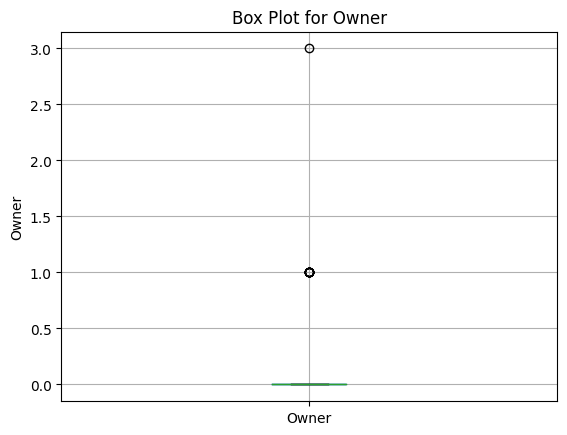

In [ ]:
# make box plot for every columns

import matplotlib.pyplot as plt

for column in df.columns:
  if df[column].dtype in ['int64', 'float64']:
    plt.figure()
    df.boxplot(column=[column])
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.show()


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# use ordinal  encoder for object type data

from sklearn.preprocessing import OrdinalEncoder

# Identify object type columns
object_cols = df.select_dtypes(include='object').columns

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform object type columns
df[object_cols] = encoder.fit_transform(df[object_cols])


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90.0,2014,3.35,5.59,27000,2.0,0.0,1.0,0
1,93.0,2013,4.75,9.54,43000,1.0,0.0,1.0,0
2,68.0,2017,7.25,9.85,6900,2.0,0.0,1.0,0
3,96.0,2011,2.85,4.15,5200,2.0,0.0,1.0,0
4,92.0,2014,4.60,6.87,42450,1.0,0.0,1.0,0


In [ ]:
from sklearn.preprocessing import StandardScaler  # Import the StandardScaler class for scaling features
import pandas as pd  # Import pandas for DataFrame operations

# Initialize StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the DataFrame `df` and transform it
# This scales all numerical columns in `df` to have a mean of 0 and a standard deviation of 1
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame
# This creates a new DataFrame `dfs` from the scaled NumPy array
dfs = pd.DataFrame(df_scaled)

# Set the column names of the new DataFrame to be the same as the original DataFrame
dfs.columns = df.columns

# Display the scaled DataFrame with original column names
dfs.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,1.074323,0.128897,-0.258416,-0.236256,-0.256224,0.500183,-0.737285,0.39148,-0.174501
1,1.191828,-0.217514,0.017481,0.221544,0.155911,-1.852241,-0.737285,0.39148,-0.174501
2,0.212627,1.168129,0.510154,0.257472,-0.773969,0.500183,-0.737285,0.39148,-0.174501
3,1.309332,-0.910335,-0.356950,-0.403151,-0.817758,0.500183,-0.737285,0.39148,-0.174501
4,1.152659,0.128897,-0.012079,-0.087906,0.141743,-1.852241,-0.737285,0.39148,-0.174501


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `dfs` is your DataFrame with scaled features
# and `target` is the column you're trying to predict

# Separate features and target variable
X = dfs.drop('Selling_Price', axis=1)  # Replace 'Selling_Price' with your actual target column name
y = dfs['Selling_Price']

# Split data into training and test sets
# 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")


Training data shape: (240, 8)
Test data shape: (61, 8)
Training target shape: (240,)
Test target shape: (61,)


        MSE      RMSE       MAE  R-squared  Adjusted R-squared
0  0.137365  0.370627  0.239386   0.846454            0.822832


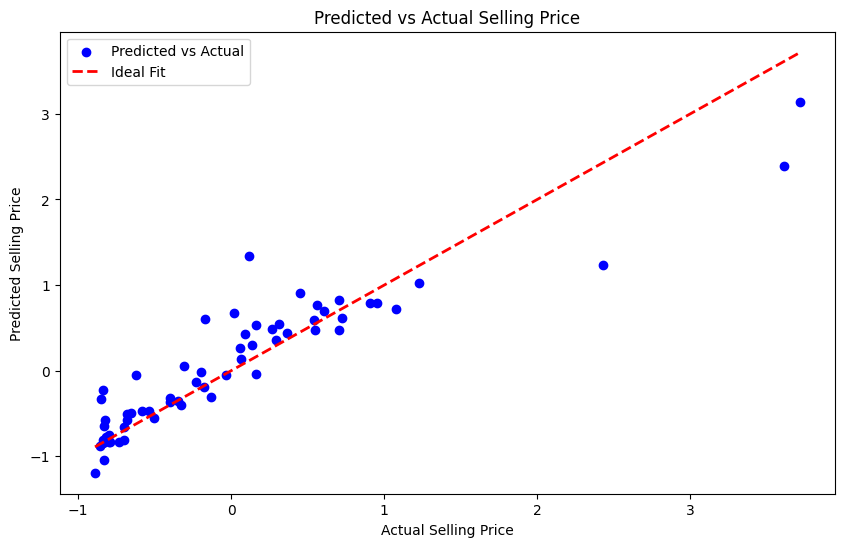

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already split your data
# X_train, X_test, y_train, y_test

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Save metrics in a DataFrame
metrics = {
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae,
    'R-squared': r2,
    'Adjusted R-squared': adjusted_r2
}

metrics_df_LR = pd.DataFrame([metrics])

# Display the metrics DataFrame
print(metrics_df_LR)

# Plot the regression line (for single feature)
if X_train.shape[1] == 1:  # Check if there is only one feature
    plt.figure(figsize=(10, 6))

    # Scatter plot of actual data
    plt.scatter(X_test, y_test, color='blue', label='Actual data')

    # Sort values for plotting regression line
    sort_index = np.argsort(X_test.values.ravel())
    plt.plot(X_test.values.ravel()[sort_index], y_pred[sort_index], color='red', linewidth=2, label='Regression line')

    plt.xlabel('Feature')
    plt.ylabel('Selling Price')
    plt.title('Linear Regression Line')
    plt.legend()
    plt.show()
else:
    # For multiple features, plot predicted vs actual values
    plt.figure(figsize=(10, 6))

    # Plot predictions vs actual values
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal Fit')

    plt.xlabel('Actual Selling Price')
    plt.ylabel('Predicted Selling Price')
    plt.title('Predicted vs Actual Selling Price')
    plt.legend()
    plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
rf = RandomForestRegressor(random_state=42)


In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = np.mean(cv_scores)
print(f"Mean CV Score (Negative MSE): {mean_cv_score}")

# Convert to positive MSE
mean_cv_score_positive = -mean_cv_score
print(f"Mean CV Score (Positive MSE): {mean_cv_score_positive}")


Mean CV Score (Negative MSE): -0.10074478513568064
Mean CV Score (Positive MSE): 0.10074478513568064


In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert to positive MSE
print(f"Best Parameters: {best_params}")
print(f"Best CV Score (Positive MSE): {best_score}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Score (Positive MSE): 0.14926028154638715


In [ ]:
# Use the best estimator found by GridSearchCV
best_rf = grid_search.best_estimator_

# Predict on the test data
y_pred = best_rf.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Save metrics in a DataFrame
metrics = {
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae,
    'R-squared': r2,
    'Adjusted R-squared': adjusted_r2
}

metrics_df_RF = pd.DataFrame([metrics])

# Display the metrics DataFrame
print(metrics_df_RF)


       MSE      RMSE       MAE  R-squared  Adjusted R-squared
0  0.03898  0.197434  0.114791   0.956428            0.949725


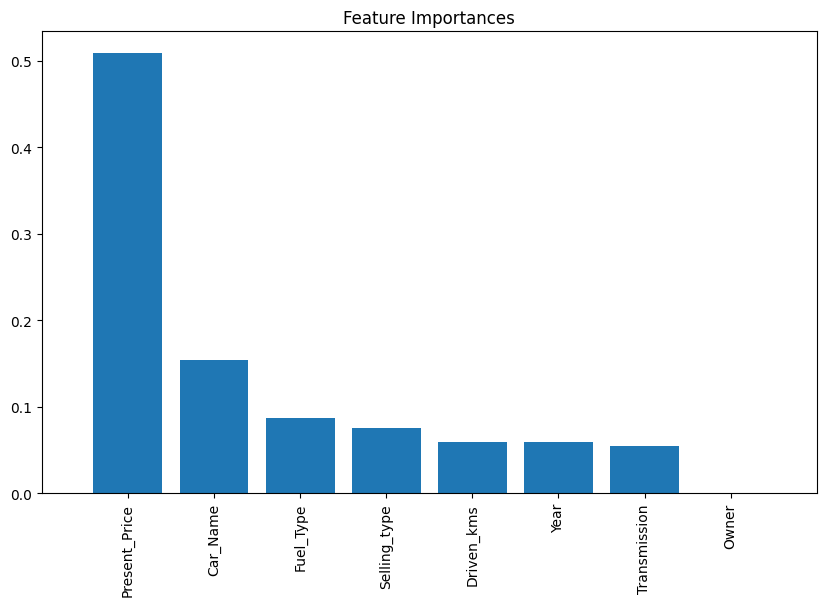

In [ ]:
# Plot feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [ ]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)


In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(xg_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = np.mean(cv_scores)
print(f"Mean CV Score (Negative MSE): {mean_cv_score}")

# Convert to positive MSE
mean_cv_score_positive = -mean_cv_score
print(f"Mean CV Score (Positive MSE): {mean_cv_score_positive}")


Mean CV Score (Negative MSE): -0.08030374872775695
Mean CV Score (Positive MSE): 0.08030374872775695


In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert to positive MSE
print(f"Best Parameters: {best_params}")
print(f"Best CV Score (Positive MSE): {best_score}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
Best CV Score (Positive MSE): 0.07385554547508819


In [ ]:
# Use the best estimator found by GridSearchCV
best_xg_reg = grid_search.best_estimator_

# Predict on the test data
y_pred = best_xg_reg.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Save metrics in a DataFrame
metrics = {
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae,
    'R-squared': r2,
    'Adjusted R-squared': adjusted_r2
}

metrics_df_XG = pd.DataFrame([metrics])

# Display the metrics DataFrame
print(metrics_df_XG)


        MSE      RMSE       MAE  R-squared  Adjusted R-squared
0  0.024679  0.157095  0.094452   0.972414             0.96817


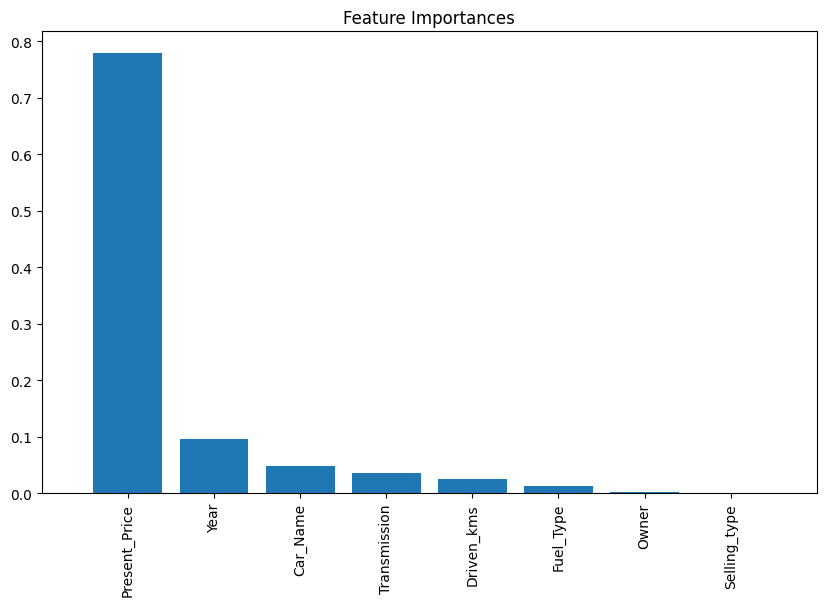

In [ ]:
# Plot feature importances
importances = best_xg_reg.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
